In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import librosa as lb
import os

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
diagnosis=pd.read_csv('/content/gdrive/MyDrive/archive/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

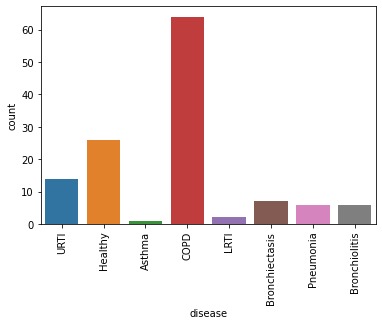

In [7]:
sns.countplot(diagnosis.disease)
plt.xticks(rotation=90)

In [8]:
import os
def extractId(filename):
    return filename.split('_')[0]

In [9]:
path='/content/gdrive/MyDrive/Audio/audio_files/content/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,176,176_2b3_Pl_mc_AKGC417L_2.wav
1,193,193_7b3_Pr_mc_AKGC417L_2.wav
2,178,178_1b6_Pl_mc_AKGC417L_2.wav
3,200,200_2p4_Ar_mc_AKGC417L_4.wav
4,179,179_1b1_Al_sc_Meditron_6.wav


In [10]:
files_df.pid=files_df.pid.astype('int64')

In [11]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,176,176_2b3_Pl_mc_AKGC417L_2.wav,COPD
1,176,176_1b3_Tc_mc_AKGC417L_4.wav,COPD
2,176,176_1b3_Tc_mc_AKGC417L_5.wav,COPD
3,176,176_1b3_Pr_mc_AKGC417L_3.wav,COPD
4,176,176_1b4_Al_mc_AKGC417L_1.wav,COPD


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

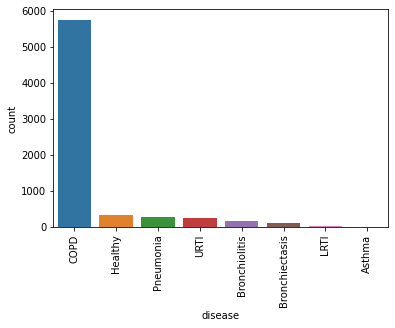

In [13]:
sns.countplot(data.disease)
plt.xticks(rotation=90)

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [15]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.832850
Healthy           0.046570
Pneumonia         0.041353
URTI              0.035556
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000773
Name: disease, dtype: float64

In [16]:
Xval.disease.value_counts()/Xval.shape[0]

COPD              0.832561
Healthy           0.046929
Pneumonia         0.041136
URTI              0.035342
Bronchiolitis     0.023175
Bronchiectasis    0.015064
LRTI              0.004635
Asthma            0.001159
Name: disease, dtype: float64

[Text(0.5, 1.0, 'MFCC')]

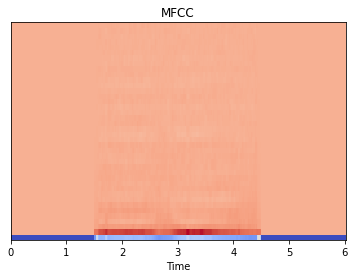

In [20]:
path='/content/gdrive/MyDrive/Audio/audio_files/content/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
ax.set(title='MFCC')

In [18]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')